**IIR 滤波器设计**

#### IIR 与 FIR 滤波器的比较

与FIR滤波器相比，IIR滤波器的主要优点是，要满足同一组设定，它的滤波器阶数通常远远低于FIR滤波器。虽然IIR滤波器具有非线性相位，但数据处理通常是“离线”执行的，即整个数据序列在滤波之前是可用的。这可以采用非因果零相位滤波方法（通过`filtfilt`函数），消除IIR滤波器的非线性相位失真。

#### 经典 IIR 滤波器

经典的IIR滤波器、Butterworth滤波器、Chebyshev I类和II类滤波器、椭圆滤波器和Bessel滤波器都以不同的方式逼近理想的矩形滤波器。

您可在模拟域和数字域以及低通、高通、带通和带阻配置中创建所有上述类型的经典IIR滤波器（Bessel滤波器除外，因为它仅支持模拟情况）。对于大多数滤波器类型，您还可以在通带和阻带衰减以及过渡宽度方面找到符合给定滤波器设定的最低滤波器阶数。

#### IIR 滤波器方法概述

下表总结了工具箱中的各种滤波器方法，并列出Matlab和Python可用于实现这些方法的函数。

<table align="center">
	<tr align="center">
	    <th>滤波器方法</th>
	    <th>说明</th>
       <th>Matlab滤波器函数</th>
	    <th>Python滤波器函数</th>  
	</tr>
   <tr>
	    <td rowspan="10">模拟原型</td>
	    <td rowspan="10">利用经典低通原型滤波器在连续（拉普拉斯）域中的极点和零点，通过频率变换和滤波器离散化获得数字滤波器。</td>
       <td colspan="2">整体设计函数：</td>
	</tr>
	<tr >
	    <td>besself, butter, cheby1, cheby2, ellip</td>
	    <td>bessel, butter, cheby1, cheby2, ellip</td>
	</tr>
	<tr>
	    <td colspan="2">阶估算函数：</td>
	</tr>
   <tr>
       <td>buttord, cheb1ord, cheb2ord, ellipord</td>
       <td>buttord, cheb1ord, cheb2ord, ellipord</td>
	</tr>
	<tr>
	    <td colspan="2">低通模拟原型函数：</td>
	</tr>
   <tr>
       <td>besselap, buttap, cheb1ap, cheb2ap, ellipap</td>
       <td>besselap, buttap, cheb1ap, cheb2ap, ellipap</td>
	</tr>
	<tr>
	    <td colspan="2">频率变换函数：</td>
	</tr>
   <tr>
       <td>lp2bp, lp2bs, lp2hp, lp2lp</td>
       <td>lp2bp, lp2bs, lp2hp, lp2lp</td>
	</tr>
	<tr>
	    <td colspan="2">滤波器离散化函数：</td>
	</tr>
   <tr>
       <td>bilinear, impinvar</td>
       <td>bilinear, 无</td>
	</tr>

#### 使用模拟原型的经典 IIR 滤波器设计

下面的IIR数字滤波器设计方法基于将经典低通模拟滤波器转换为其等效的数字滤波器。以下各节说明如何设计滤波器，并总结了支持的滤波器类型的特征。

1. 完成经典IIR滤波器设计

使用滤波器设计函数，您可以轻松创建具有低通、高通、带通或带阻配置的任意阶滤波器。下面是滤波器设计函数一览表。

<table align="center">
	<tr align="center">
	    <th>滤波器类型</th>
	    <th>Matlab设计函数</th>
       <th>Python设计函数</th>  
	</tr>
   <tr>
	    <td rowspan="3">Bessel（仅模拟）</td>
	    <td>[b,a] = besself(n,Wn,options)</td>
       <td>b,a = signal.bessel(n,Wn,options)</td>
	</tr>
	<tr >
	    <td>[z,p,k] = besself(n,Wn,options)</td>
	    <td>z,p,k = signal.bessel(n,Wn,options)</td>
	</tr>
	<tr >
	    <td>[A,B,C,D] = besself(n,Wn,options)</td>
	    <td>sos = signal.bessel(n,Wn,options)</td>
	</tr>
   <tr>
	    <td rowspan="3">Butterworth</td>
	    <td>[b,a] = butter(n,Wn,options)</td>
       <td>b,a = signal.butter(n,Wn,options)</td>
	</tr>
	<tr >
	    <td>[z,p,k] = butter(n,Wn,options)</td>
	    <td>z,p,k = signal.butter(n,Wn,options)</td>
	</tr>
	<tr >
	    <td>[A,B,C,D] = butter(n,Wn,options)</td>
	    <td>sos = signal.butter(n,Wn,options)</td>
	</tr>
   <tr>
	    <td rowspan="3">Chebyshev I 类</td>
	    <td>[b,a] = cheby1(n,Rp,Wn,options)</td>
       <td>b,a = signal.cheby1(n,rp,Wn,options)</td>
	</tr>
	<tr >
	    <td>[z,p,k] = cheby1(n,Rp,Wn,options)</td>
	    <td>z,p,k = signal.cheby1(n,rp,Wn,options)</td>
	</tr>
	<tr >
	    <td>[A,B,C,D] = cheby1(n,Rp,Wn,options)</td>
	    <td>sos = signal.cheby1(n,rp,Wn,options)</td>
	</tr>
   <tr>
	    <td rowspan="3">Chebyshev II 类</td>
	    <td>[b,a] = cheby2(n,Rs,Wn,options)</td>
       <td>b,a = signal.cheby2(n,rs,Wn,options)</td>
	</tr>
	<tr >
	    <td>[z,p,k] = cheby2(n,Rs,Wn,options)</td>
	    <td>z,p,k = signal.cheby2(n,rs,Wn,options)</td>
	</tr>
	<tr >
	    <td>[A,B,C,D] = cheby2(n,Rs,Wn,options)</td>
	    <td>sos = signal.cheby2(n,rs,Wn,options)</td>
	</tr>
   <tr>
	    <td rowspan="3">椭圆</td>
	    <td>[b,a] = ellip(n,Rp,Rs,Wn,options)</td>
       <td>b,a = signal.ellip(n,rp,rs,Wn,options)</td>
	</tr>
	<tr >
	    <td>[z,p,k] = ellip(n,Rp,Rs,Wn,options)</td>
	    <td>z,p,k = signal.ellip(n,rp,rs,Wn,options)</td>
	</tr>
	<tr >
	    <td>[A,B,C,D] = ellip(n,Rp,Rs,Wn,options)</td>
	    <td>sos = signal.ellip(n,rp,rs,Wn,options)</td>
	</tr>

默认情况下，这些函数都返回低通滤波器；您只需指定所需的截止频率Wn，以归一化单位表示（使Nyquist频率为 1 Hz）。要获得高通滤波器，请将`'high'`附加到函数的参数列表中。要获得带通或带阻滤波器，请将Wn指定为包含通带边缘频率的二元素向量。为带阻配置追加`'stop'`。

以下是一些数字滤波器示例：

In [1]:
import numpy as np
from scipy import signal

b,a = signal.butter(5,0.4)
b,a = signal.cheby1(4,1,np.array([0.4,0.7]),'bandpass')
b,a = signal.cheby2(6,60,0.8,'highpass')
b,a = signal.ellip(3,1,60,np.array([0.4,0.7]),'bandstop')

要设计一个模拟滤波器（可能是出于仿真需要），对于Matlab，请在尾部添加参数`'s'`；对于Python，请将`'analog'`指定为`'True'`。以弧度/秒为单位指定截止频率：

In [2]:
b,a = signal.butter(5,0.4,analog=True)

所有滤波器设计函数都会返回一个以传递函数、零极点增益或状态空间线性系统模型形式表示的滤波器，具体形式取决于存在多少输出参数。一般情况下，您应该避免使用传递函数形式，因为可能会发生舍入误差导致的数值问题。更好的做法是使用零极点增益形式，您可以使用`zp2sos`将其转换为二阶节 (sos) 形式，然后使用sos形式来分析或实现您的滤波器。

**注意**：所有经典的 IIR 低通滤波器都不适用于极低的截止频率。因此，与其设计通带非常窄的低通 IIR 滤波器，不如设计更宽的通带并抽取输入信号。

2. 按照频域设定设计 IIR 滤波器

下面的函数提供阶选择函数，用于计算满足一组给定要求的最小滤波器阶。

<table align="center">
	<tr align="center">
	    <th>滤波器类型</th>
	    <th>Matlab阶估计函数</th>
       <th>Python阶估计函数</th>  
	</tr>
   <tr>
	    <td>Butterworth</td>
	    <td>[n,Wn] = buttord(Wp,Ws,Rp,Rs)</td>
       <td>ord,wn = signal.buttord(wp,ws,gpass,gstop,options)</td>
	</tr>
   <tr>
	    <td>Chebyshev I 类</td>
	    <td>[n,Wn] = cheb1ord(Wp,Ws,Rp,Rs)</td>
       <td>ord,wn = signal.cheb1ord(wp,ws,gpass,gstop,options)</td>
	</tr>
   <tr>
	    <td>Chebyshev II 类</td>
	    <td>[n,Wn] = cheb2ord(Wp,Ws,Rp,Rs)</td>
       <td>ord,wn = signal.cheb2ord(wp,ws,gpass,gstop,options)</td>
	</tr>
   <tr>
	    <td>椭圆</td>
	    <td>[n,Wn] = ellipord(Wp,Ws,Rp,Rs)</td>
       <td>ord,wn = signal.ellipord(wp,ws,gpass,gstop,options)</td>
	</tr>

它们与滤波器设计函数结合使用时非常有用。假设您需要一个具有以下设定的带通滤波器：通带为1000至2000 Hz，阻带从通带两侧外500 Hz处开始，采样频率为10 kHz，通带波纹至多1 dB，阻带衰减至少60 dB。您可以通过使用以下butter函数来满足这些设定。

In [3]:
n,wn = (signal.buttord(np.array([1000,2000])/5000,
np.array([500,2500])/5000,1,60,'bandpass'))
b,a = signal.butter(n,wn,'bandpass')

输出结果为：

In [4]:
print('n = %d' %n);print('wn = {}'.format(wn))

n = 15
wn = [0.19695993 0.40617398]


满足相同要求的椭圆滤波器由下式给出

In [5]:
n,wn = (signal.ellipord(np.array([1000,2000])/5000,
np.array([500,2500])/5000,1,60,'bandpass'))
b,a = signal.ellip(n,1,60,wn,'bandpass')

输出结果为：

In [6]:
print('n = %d' %n);print('wn = {}'.format(wn))

n = 5
wn = [0.2 0.4]


这些函数也适用于其他标准频带配置以及模拟滤波器。

#### 经典 IIR 滤波器类型的比较

以下五种不同类型的经典 IIR 滤波器，它们各有所长。本部分显示每种滤波器的基本模拟原型形式，并总结了主要特征。

1. Butterworth滤波器

Butterworth滤波器提供理想低通滤波器在模拟频率$\omega=0$和$\omega=\infty$处的响应的最佳泰勒级数逼近；对于任意阶N，幅值平方响应在这两个位置的2N–1阶导数为零（即在$\omega=0$和$\omega=\infty$处达到最大平坦）。总体而言，响应呈单调形态，从$\omega=0$和$\omega=\infty$平稳下降。在$\omega=1$处，$|H(j\omega)|=1/\sqrt{2}$。

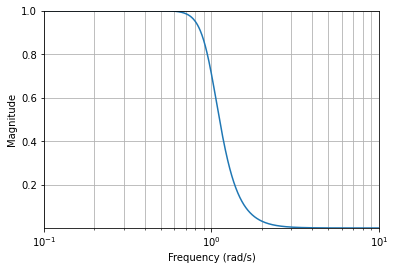

In [7]:
import matplotlib.pyplot as plt

z,p,k = signal.buttap(5)
w,h = signal.freqs_zpk(z,p,k,np.logspace(-1,1,1000))
fig,ax = plt.subplots();
ax.semilogx(w,np.abs(h));ax.grid(which='both')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude')
ax.autoscale(tight=True)
fig.savefig('./program1.png',dpi=500)

2. Chebyshev I类滤波器

Chebyshev I类滤波器通过在通带中引入$R_p$dB的等波纹，将整个通带的理想和实际频率响应之间的绝对差降至最低。其阻带响应达到最大平坦度。从通带到阻带的过渡比Butterworth滤波器更快。在$\omega=1$处，$|H(j\omega)|=10^{-R_p/{20}}$。

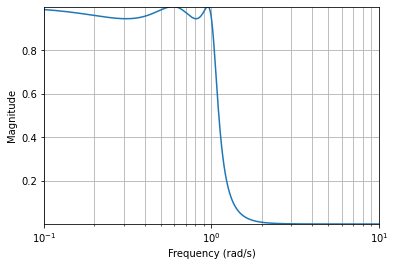

In [8]:
z,p,k = signal.cheb1ap(5,0.5)
w,h = signal.freqs_zpk(z,p,k,np.logspace(-1,1,1000))
fig,ax = plt.subplots();
ax.semilogx(w,np.abs(h));ax.grid(which='both')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude')
ax.autoscale(tight=True)
fig.savefig('./program2.png',dpi=500)

3. Chebyshev II类滤波器

Chebyshev II类滤波器通过在阻带中加入R_sdB的等波纹，将整个阻带的理想频率响应和实际频率响应之间的绝对差降至最低。其通带响应达到最大平坦度。

阻带不像I类滤波器那样快地逼近零（对于偶数滤波器阶N则根本不会逼近零）。然而，通带中没有波纹通常是重要优势。在$\omega=1$处，$|H(j\omega)|=10^{-R_s/{20}}$。

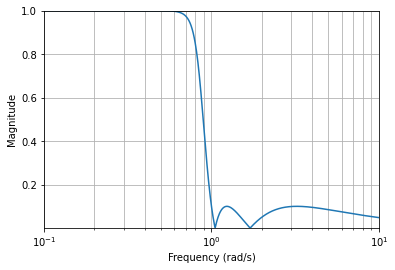

In [9]:
z,p,k = signal.cheb2ap(5,20)
w,h = signal.freqs_zpk(z,p,k,np.logspace(-1,1,1000))
fig,ax = plt.subplots();
ax.semilogx(w,np.abs(h));ax.grid(which='both')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude')
ax.autoscale(tight=True)
fig.savefig('./program3.png',dpi=500)

4. 椭圆滤波器

椭圆滤波器在通带和阻带中均采用等波纹。它们通常以任何支持的滤波器类型中的最低阶满足滤波器要求。在给定滤波器阶数N、以分贝为单位的通带波纹$R_p$、以分贝为单位的阻带波纹$R_s$的情况下，椭圆滤波器可以最小化过渡宽度。在$\omega=1$处，$|H(j\omega)|=10^{-R_p/{20}}$。

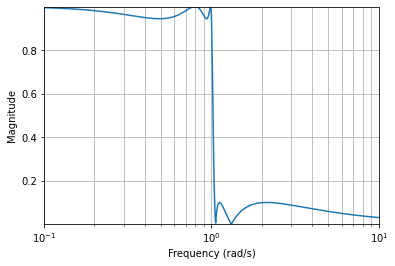

In [10]:
z,p,k = signal.ellipap(5,0.5,20)
w,h = signal.freqs_zpk(z,p,k,np.logspace(-1,1,1000))
fig,ax = plt.subplots();
ax.semilogx(w,np.abs(h));ax.grid(which='both')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude')
ax.autoscale(tight=True)
fig.savefig('./program4.png',dpi=500)

5. Bessel 滤波器

模拟Bessel低通滤波器在零频率处具有最大平坦度的群延迟，并且在整个通带内保持几乎恒定的群延迟。因此，滤波后的信号在通带频率范围内保持其波形。当模拟Bessel低通滤波器通过频率映射转换为数字滤波器时，它不再具有这种最大平坦属性。Signal Processing Toolbox™仅支持使用完整Bessel设计函数实现模拟滤波器。

相比其他滤波器，Bessel 滤波器通常需要更高的阶数才能获得理想的阻带衰减。在$\omega=1$处，$|H(j\omega)|<1/\sqrt{2}$，并且会随着滤波器阶数 n 的增大而减小。

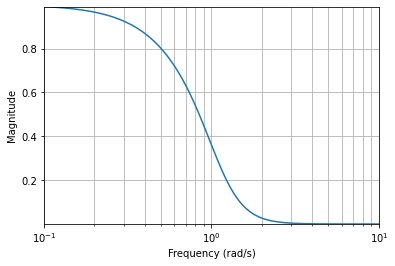

In [11]:
z,p,k = signal.besselap(5)
w,h = signal.freqs_zpk(z,p,k,np.logspace(-1,1,1000))
fig,ax = plt.subplots();
ax.semilogx(w,np.abs(h));ax.grid(which='both')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude')
ax.autoscale(tight=True)
fig.savefig('./program5.png',dpi=500)

**注意**：上面显示的低通滤波器是用模拟原型函数 besselap、buttap、cheb1ap、cheb2ap 和 ellipap 创建的。这些函数求截止频率为 1 弧度/秒的适当类型的 n 阶模拟滤波器的零点、极点和增益。滤波器整体设计函数（bessel、butter、cheby1、cheby2 和 ellip）将调用原型函数作为设计过程的第一步